<h1 style = "text-align:center; font-size:300%">Startup Expansion Data Analysis</h1>

---

# Importing Libraries (Toolkit)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use(style='ggplot')

import warnings
warnings.filterwarnings('ignore')

---

---

# Loading & Inspecting Data

In [2]:
data = pd.read_excel('startup-expansion-data.xlsx')
data

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [3]:
# Getting information about each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


---

---

# Preprocessing Data

### 1.  Column Names

In [4]:
print(f'Column names before the change: {data.columns}')

Column names before the change: Index(['Store ID', 'City', 'State', 'Sales Region', 'New Expansion',
       'Marketing Spend', 'Revenue'],
      dtype='object')


In [5]:
# rename columns
data.columns = data.columns.str.lower()

In [6]:
# Deleting all spaces between the column names 
data.columns = [col.replace(' ', '_') for col in data.columns]

In [7]:
print(f'Column names after the change: {data.columns}')

Column names after the change: Index(['store_id', 'city', 'state', 'sales_region', 'new_expansion',
       'marketing_spend', 'revenue'],
      dtype='object')


---

### 2. Missing Values

In [8]:
# Check the sum of missing values for each column
data.isna().sum()

store_id           0
city               0
state              0
sales_region       0
new_expansion      0
marketing_spend    0
revenue            0
dtype: int64

- The dataset doesn't have any missing values.

---

### 3. Duplicate Values

In [9]:
# Check Duplicate Values
data.duplicated().sum()

0

- The dataset doesn't have any duplicate values.

---

### 4. Bad Data

In [10]:
data['city'].nunique()

149

In [11]:
data['city'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [12]:
data['state'].nunique()

35

In [13]:
data['state'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [14]:
data['sales_region'].nunique()

2

In [15]:
data['sales_region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [16]:
data['new_expansion'].nunique()

2

In [17]:
data['new_expansion'].unique()

array(['Old', 'New'], dtype=object)

- The dataset doesn't have any bad data 

---

### 5. Feature Engineering

In [18]:
# create a column to calculate the profit
data['profit'] = data['revenue'] - data['marketing_spend']

In [19]:
# create a column to calculate the ROMS (Return On Marketing Spend)
data['roms'] = round((data['profit'] / data['marketing_spend']) * 100, 2)

In [20]:
# create a column to calculate the percentage of the ROMS 
data['roms%'] = round(data['roms'] / 100, 2)

In [21]:
data.sample(10)

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
62,63,Richmond,California,Region 2,Old,3924,19448,15524,395.62,3.96
34,35,Huntsville,Alabama,Region 1,Old,3335,59283,55948,1677.60,16.78
20,21,Concord,California,Region 2,Old,2521,38178,35657,1414.40,14.14
137,138,Norwalk,California,Region 2,Old,3112,19703,16591,533.13,5.33
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.69
143,144,Rancho Cucamonga,California,Region 2,New,2945,52366,49421,1678.13,16.78
82,83,North Charleston,South Carolina,Region 1,Old,3115,18754,15639,502.05,5.02
134,135,Santa Rosa,California,Region 2,Old,3067,59060,55993,1825.66,18.26
132,133,Des Moines,Iowa,Region 1,Old,2995,57432,54437,1817.60,18.18
23,24,Burbank,California,Region 2,Old,3679,20123,16444,446.97,4.47


---

### 6. Outliers

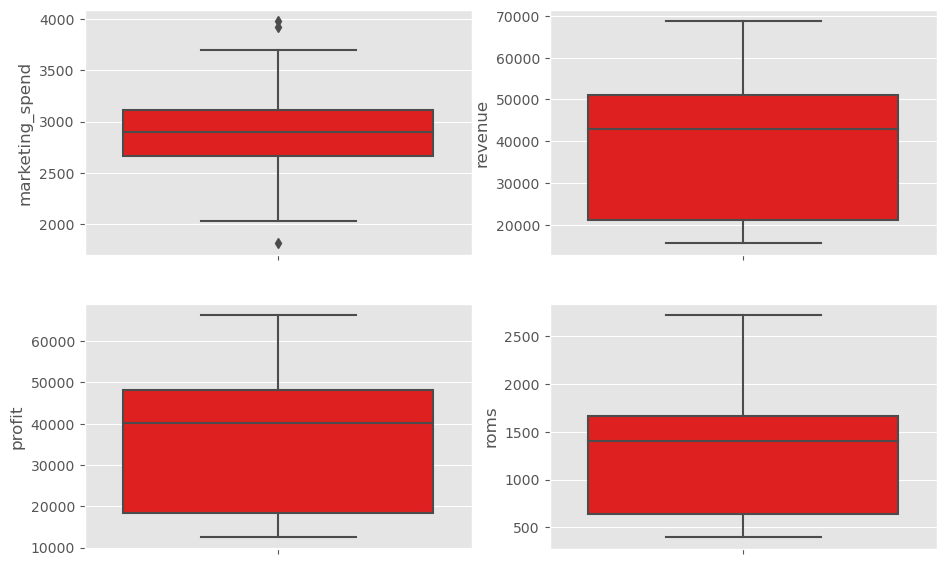

In [22]:
# check the outliers
plt.figure(figsize=(11,7))
for i, v in enumerate(['marketing_spend', 'revenue', 'profit', 'roms']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data = data, y = v, color = 'red')
plt.show()

- The dataset doesn't have any outliers

### 7. Save Data

In [23]:
data.to_csv('startup-expansion-modified.csv')

---

---

# Exploratory Data Analysis (EDA)

### Q1: Getting the statistical information of numerical data and the distribution of it!

In [24]:
# Creating a descriptive statistics table for numerical data
data[['marketing_spend', 'revenue', 'profit', 'roms']].describe().round(2)

,marketing_spend,revenue,profit,roms
count,150.00,150.00,150.00,150.00
mean,2893.15,39301.43,36408.29,1274.38
std,367.86,15465.75,15435.41,547.87
min,1811.00,15562.00,12433.00,395.62
25%,2662.25,21113.50,18339.00,637.38
50%,2898.00,42993.00,40053.00,1406.32
75%,3111.50,51145.50,48163.25,1660.32
max,3984.00,68828.00,66388.00,2720.82


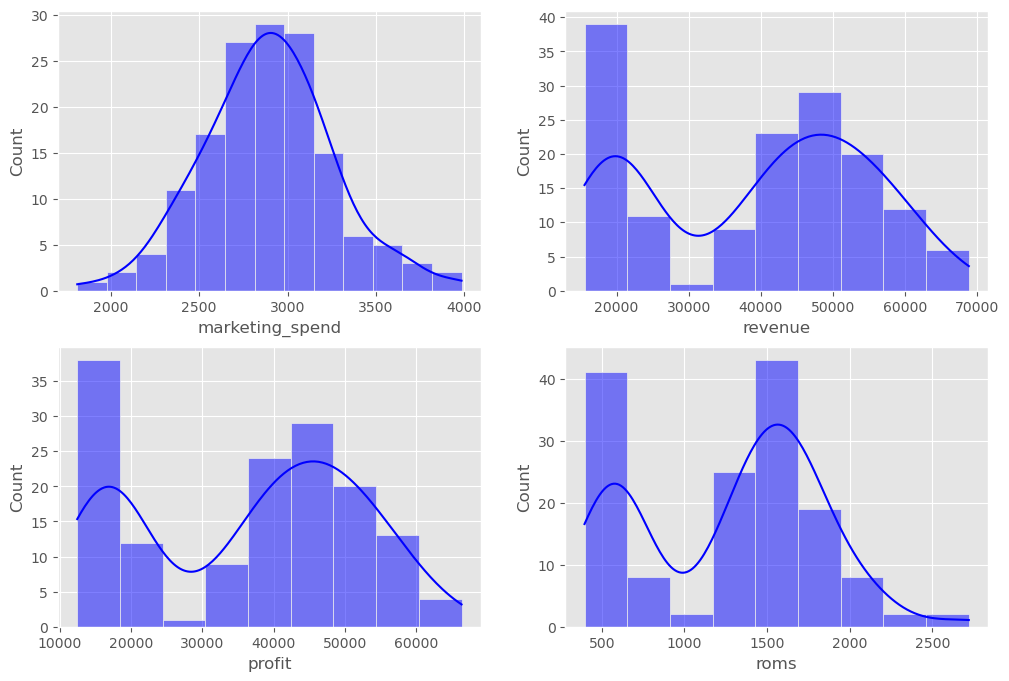

In [25]:
# Drawing a histogram to display the distribution of each numerical column
plt.figure(figsize = (12, 8))
for i, col in enumerate(['marketing_spend', 'revenue', 'profit', 'roms']):
    plt.subplot(2, 2, i+1)
    sns.histplot(data = data, x = col, kde = True, color = 'blue')
    plt.xlabel(col)
plt.show()

---

### Q2. How many stores are in each region?

In [26]:
data['sales_region'].value_counts()

Region 2    86
Region 1    64
Name: sales_region, dtype: int64

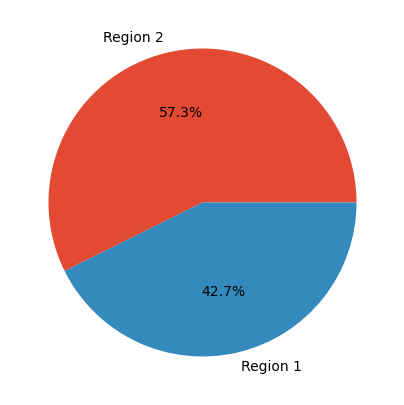

In [27]:
plt.subplots(figsize = (12, 5))
plt.pie(x = data['sales_region'].value_counts().values, 
          labels = data['sales_region'].value_counts().index, 
          autopct = '%1.1f%%')
plt.show()

---

### Q3. How many stores are in each State?

In [28]:
data['state'].value_counts()

California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: state, dtype: int64

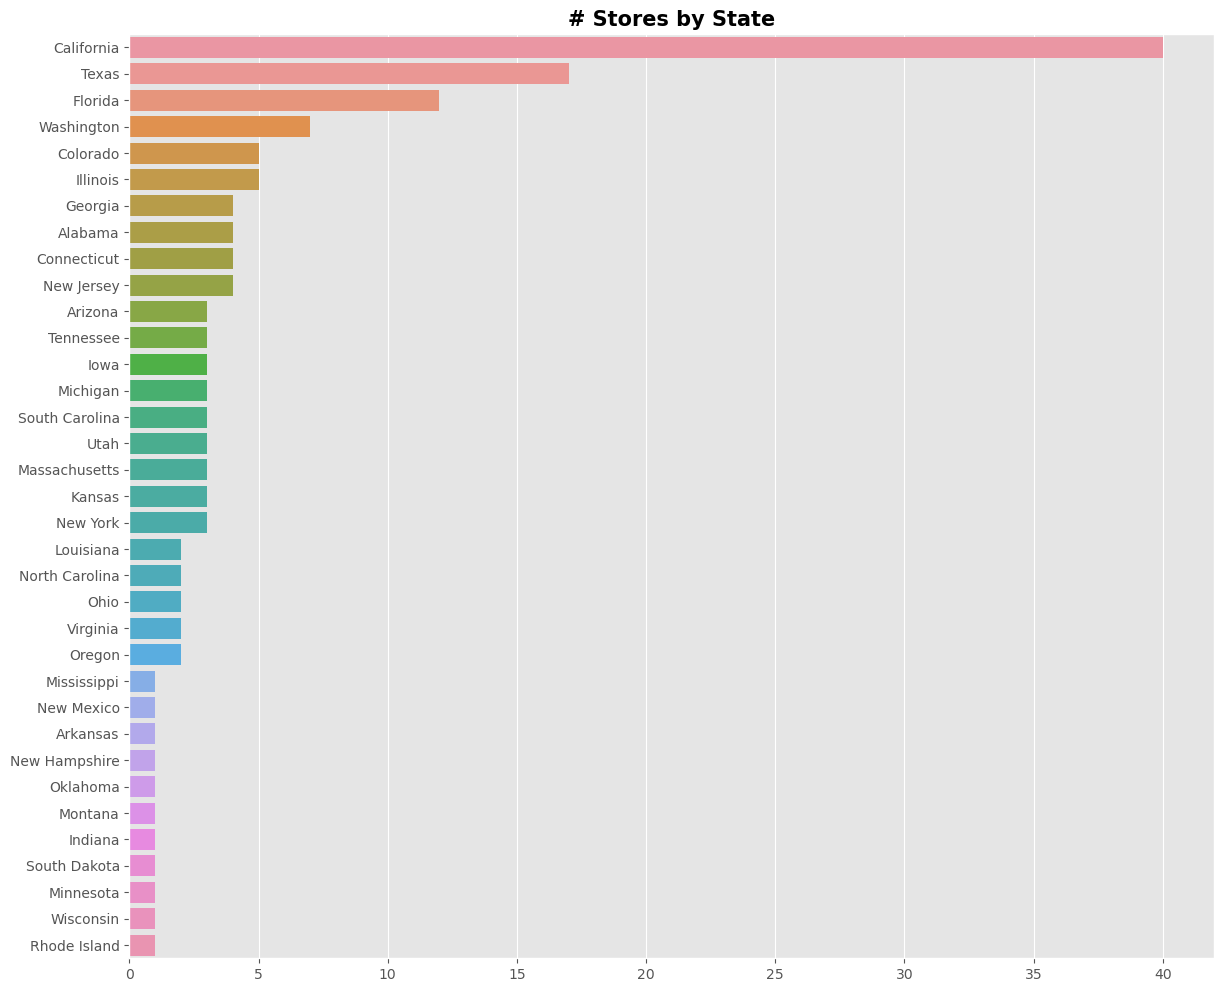

In [29]:
plt.figure(figsize = (14, 12))
sns.barplot(data = data,
              y = data['state'].value_counts().index,
              x = data['state'].value_counts().values)
plt.title(f'# Stores by State', size = 15, weight='bold')
plt.show()

---

### Q4. How many stores are new and old?

In [30]:
data['new_expansion'].value_counts()

Old    140
New     10
Name: new_expansion, dtype: int64

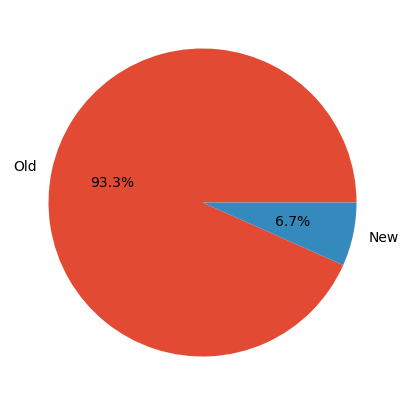

In [31]:
plt.subplots(figsize = (12, 5))
plt.pie(x = data['new_expansion'].value_counts().values, 
          labels = data['new_expansion'].value_counts().index, 
          autopct = '%1.1f%%')
plt.show()

---

### Q5.  what are the top 10 states that have profit?

In [32]:
data.groupby('state').sum()['profit'].nlargest(10)

state
California     1390222
Texas           589623
Florida         443549
Washington      278045
Alabama         208455
Illinois        186549
New York        151609
Georgia         147316
Connecticut     146142
Tennessee       142956
Name: profit, dtype: int64

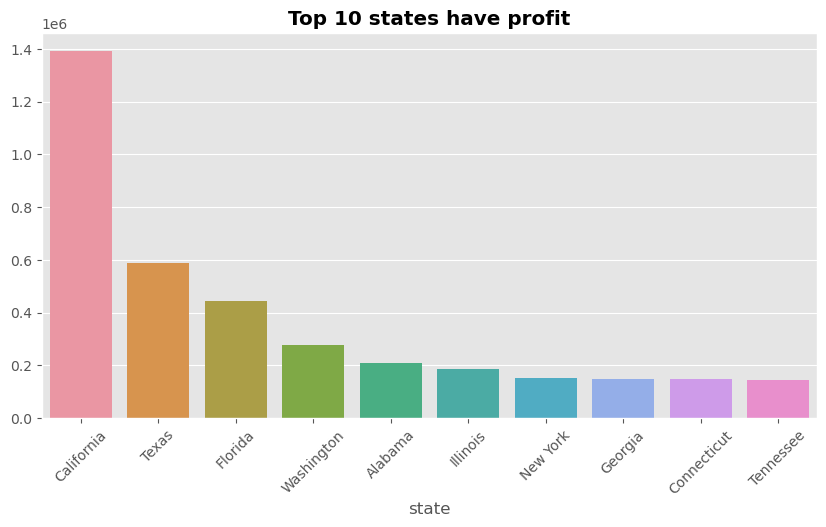

In [33]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 45)
sns.barplot(data = data, 
            x = data.groupby('state').sum()['profit'].nlargest(10).index,
            y = data.groupby('state').sum()['profit'].nlargest(10).values, 
            ci = False,
            estimator = np.sum)
# Add title
plt.title('Top 10 states have profit', weight = 'bold')
plt.show()

---

### Q6. what are the top 10 cities in California that have profit?

In [34]:
data[data['state'] == 'California'].sort_values(by = 'profit', ascending = False)[['city', 'profit']].head(10)

,city,profit
37,Oxnard,61984
17,Fontana,59942
44,San Bernardino,56471
134,Santa Rosa,55993
128,Moreno Valley,55747
80,Garden Grove,54245
21,Modesto,53759
66,Oceanside,52600
118,Huntington Beach,51618
143,Rancho Cucamonga,49421


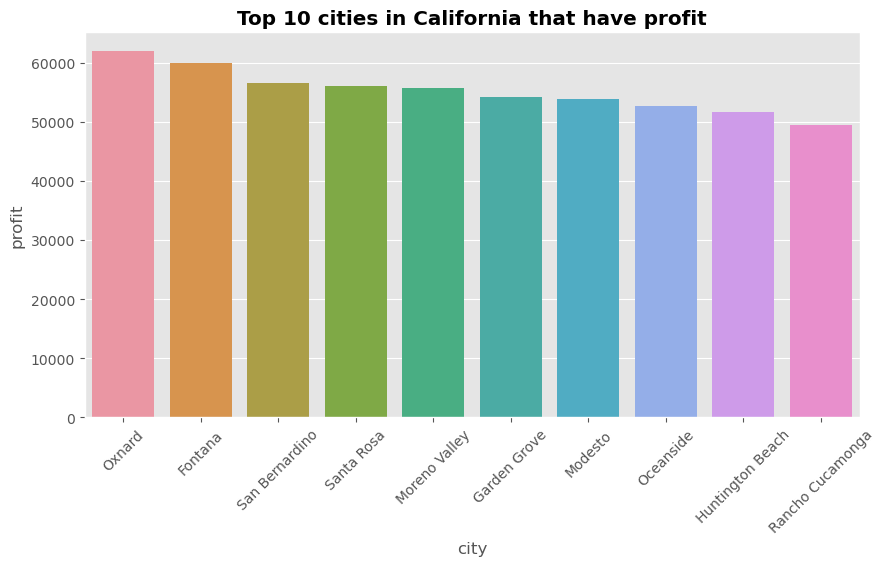

In [35]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 45)
sns.barplot(data = data, 
            x = data[data['state'] == 'California'].sort_values(by = 'profit', ascending = False)['city'].head(10),
            y = data[data['state'] == 'California'].sort_values(by = 'profit', ascending = False)['profit'].head(10), 
            ci = False)
# Add title
plt.title('Top 10 cities in California that have profit', weight = 'bold')
plt.show()

---

### Q7. what are the top 10 cities that have profit?

In [36]:
data.groupby('city').sum()['profit'].nlargest(10)

city
Rochester        77167
Little Rock      66388
Grand Rapids     62667
Oxnard           61984
Fontana          59942
Brownsville      59473
Providence       59146
Birmingham       57228
Worcester        57165
Overland Park    57018
Name: profit, dtype: int64

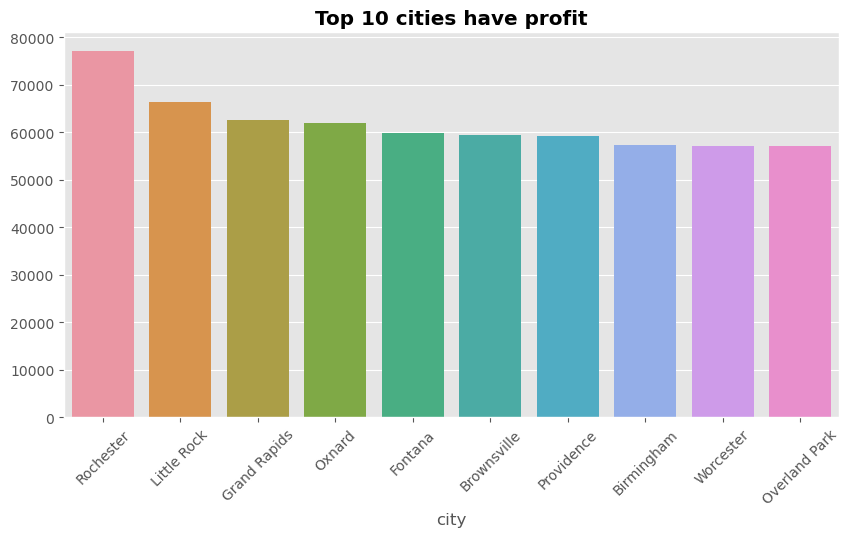

In [37]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 45)
sns.barplot(data = data, 
            x = data.groupby('city').sum()['profit'].nlargest(10).index,
            y = data.groupby('city').sum()['profit'].nlargest(10).values, 
            ci = False,
            estimator = np.sum)
# Add title
plt.title('Top 10 cities have profit', weight = 'bold')
plt.show()

---

### Q8. What is the total profit by sales region?

In [38]:
data.groupby('sales_region').sum()['profit'].sort_values(ascending = False)

sales_region
Region 2    3049838
Region 1    2411405
Name: profit, dtype: int64

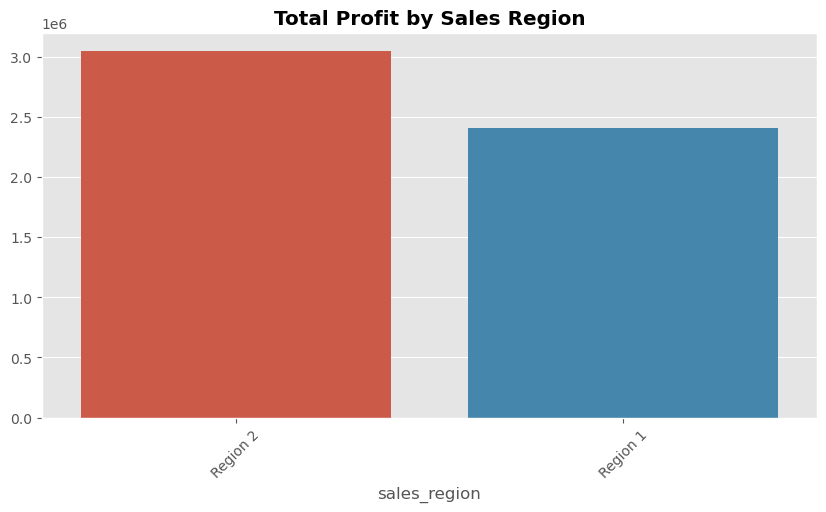

In [39]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 45)
sns.barplot(data = data, 
            x = data.groupby('sales_region').sum()['profit'].nlargest(10).index,
            y = data.groupby('sales_region').sum()['profit'].nlargest(10).values, 
            ci = False,
            estimator = np.sum)
# Add title
plt.title('Total Profit by Sales Region', weight = 'bold')
plt.show()

---

### Q9. What is the total profit by new expansion?

In [40]:
data.groupby('new_expansion').sum()['profit'].sort_values(ascending = False)

new_expansion
Old    5032233
New     429010
Name: profit, dtype: int64

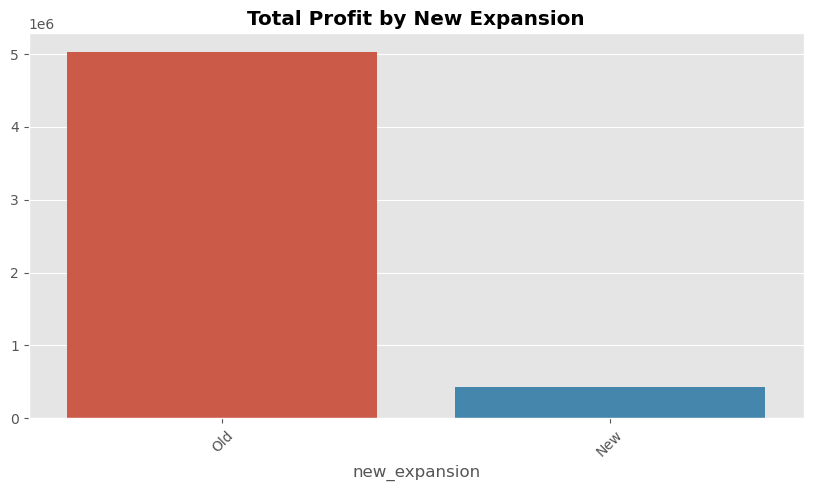

In [41]:
plt.figure(figsize = (10, 5))
plt.xticks(rotation = 45)
sns.barplot(data = data, 
            x = data.groupby('new_expansion').sum()['profit'].nlargest(10).index,
            y = data.groupby('new_expansion').sum()['profit'].nlargest(10).values, 
            ci = False,
            estimator = np.sum)
# Add title
plt.title('Total Profit by New Expansion', weight = 'bold')
plt.show()

---

### Q10. What happens to profit with an increase in Marketing Spend?

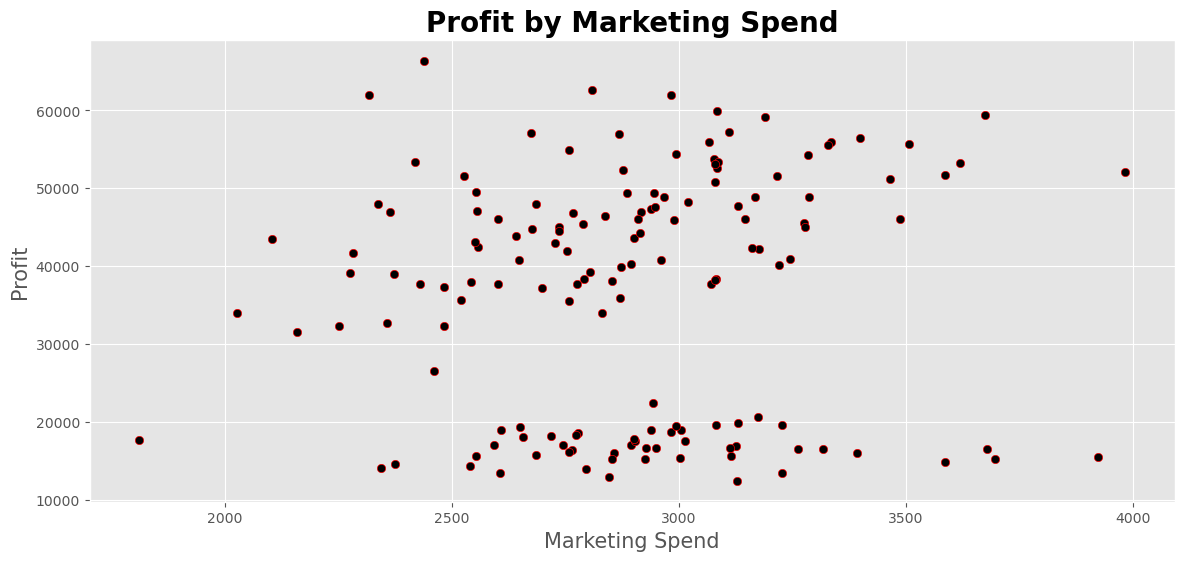

In [42]:
plt.figure(figsize = (14, 6))
sns.scatterplot(data = data, 
                x = 'marketing_spend', 
                y = 'profit',
                color = 'black',
                edgecolor = "red")

# Add labels and title
plt.title('Profit by Marketing Spend', size = 20, weight = 'bold')
plt.xlabel('Marketing Spend', size = 15)
plt.ylabel('Profit', size = 15)
plt.show()

- Profit is not affected by an increase in Marketing Spend.

---

### Q11. Which store has the largest revenue in all data?

In [54]:
data.nlargest(1, columns = 'revenue')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828,66388,2720.82,27.21


---

### Q12. Which store has the smallest revenue in all data?

In [55]:
data.nsmallest(1, columns = 'revenue')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
53,54,Everett,Washington,Region 2,Old,3129,15562,12433,397.35,3.97


---

### Q13. Which store has the largest revenue in region 1?

In [59]:
data[data['sales_region'] == 'Region 1'].nlargest(1, columns = 'revenue')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
31,32,Grand Rapids,Michigan,Region 1,Old,2808,65475,62667,2231.73,22.32


---

### Q14. Which store has the smallest revenue in region 1?

In [62]:
data[data['sales_region'] == 'Region 1'].nsmallest(1, columns = 'revenue')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
52,53,Manchester,New Hampshire,Region 1,Old,2374,17006,14632,616.34,6.16


---

### Q15. Which store has the largest revenue in region 2?

In [60]:
data[data['sales_region'] == 'Region 2'].nlargest(1, columns = 'revenue')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828,66388,2720.82,27.21


---

### Q16. Which store has the smallest revenue in region 2?

In [63]:
data[data['sales_region'] == 'Region 2'].nsmallest(1, columns = 'revenue')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
53,54,Everett,Washington,Region 2,Old,3129,15562,12433,397.35,3.97


---

### Q17. Which store has the largest marketing spend in all data?

In [57]:
data.nlargest(1, columns = 'marketing_spend')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
86,87,Amarillo,Texas,Region 2,Old,3984,56089,52105,1307.86,13.08


---

### Q18. Which store has the smallest marketing spend in all data?

In [58]:
data.nsmallest(1, columns = 'marketing_spend')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
135,136,San Mateo,California,Region 2,Old,1811,19426,17615,972.67,9.73


---

### Q19. Which store has the largest marketing spend in region 1?

In [65]:
data[data['sales_region'] == 'Region 1'].nlargest(1, columns = 'marketing_spend')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
133,134,Green Bay,Wisconsin,Region 1,Old,3586,18454,14868,414.61,4.15


---

### Q20. Which store has the smallest marketing spend in region 1?

In [67]:
data[data['sales_region'] == 'Region 1'].nsmallest(1, columns = 'marketing_spend')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
130,131,Savannah,Georgia,Region 1,Old,2028,36029,34001,1676.58,16.77


---

### Q21. Which store has the largest marketing spend in region 2?

In [68]:
data[data['sales_region'] == 'Region 2'].nlargest(1, columns = 'marketing_spend')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
86,87,Amarillo,Texas,Region 2,Old,3984,56089,52105,1307.86,13.08


---

### Q22. Which store has the smallest marketing spend in region 2?

In [69]:
data[data['sales_region'] == 'Region 2'].nsmallest(1, columns = 'marketing_spend')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
135,136,San Mateo,California,Region 2,Old,1811,19426,17615,972.67,9.73


---

### Q23. Which store has the largest revenue in old expansion?

In [71]:
data[data['new_expansion'] == 'Old'].nlargest(1, columns = 'revenue')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
63,64,Little Rock,Arkansas,Region 2,Old,2440,68828,66388,2720.82,27.21


---

### Q24. Which store has the smallest revenue in old expansion?

In [72]:
data[data['new_expansion'] == 'Old'].nsmallest(1, columns = 'revenue')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
53,54,Everett,Washington,Region 2,Old,3129,15562,12433,397.35,3.97


---

### Q25. Which store has the largest revenue in new expansion?

In [73]:
data[data['new_expansion'] == 'New'].nlargest(1, columns = 'revenue')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.18


---

### Q26. Which store has the smallest revenue in new expansion?

In [74]:
data[data['new_expansion'] == 'New'].nsmallest(1, columns = 'revenue')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.5


---

### Q27. Which store has the largest marketing spend in old expansion?

In [75]:
data[data['new_expansion'] == 'Old'].nlargest(1, columns = 'marketing_spend')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
86,87,Amarillo,Texas,Region 2,Old,3984,56089,52105,1307.86,13.08


---

### Q28. Which store has the smallest marketing spend in old expansion?

In [76]:
data[data['new_expansion'] == 'Old'].nsmallest(1, columns = 'marketing_spend')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
135,136,San Mateo,California,Region 2,Old,1811,19426,17615,972.67,9.73


---

### Q29. Which store has the largest marketing spend in new expansion?

In [77]:
data[data['new_expansion'] == 'New'].nlargest(1, columns = 'marketing_spend')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.18


---

### Q30. Which store has the smallest marketing spend in new expansion?

In [78]:
data[data['new_expansion'] == 'New'].nsmallest(1, columns = 'marketing_spend')

,store_id,city,state,sales_region,new_expansion,marketing_spend,revenue,profit,roms,roms%
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.37


---

---

# GOOD LUCK!